In [4]:
%pip install numpy pandas matplotlib scikit-learn h5py

You should consider upgrading via the 'c:\Users\yongz\Documents\ICT2211\Nature energy - code\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
# import h5py
import scipy.io
import scipy.stats
import sklearn.metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
featFileName = "/Users/guancong/Desktop/sch/3110_ITP/BatteryLifeTimeML/Data/features_combined.csv"
batch_pd = pd.read_csv(featFileName, index_col=False)
batch_pd

,policy,barcode,cycle_life,QD2,QD(Max-2),QD100,QDiffMin,QDiffMean,QDiffVar,QDiffSkew,QDiffKurtosis,QDiffStart,R3Coef,R3Intercept,R1Coef,R1Intercept,QDiffLinVar
0,3_6C-80PER_3_6C,???,1189.0,1.070689,0.468365,1.075913,-2.072648,-2.541602,-5.014861,-0.274041,0.129790,-4.261444,-0.000210,1.091262,0.000039,1.072078,-4.365945
1,3_6C-80PER_3_6C,???,1178.0,1.075301,0.009288,1.080630,-1.958457,-2.387257,-5.013960,-0.367163,0.012464,-3.803325,0.000006,1.080945,-0.000041,1.084710,-3.470844
2,3_6C-80PER_3_6C,???,1176.0,1.079922,0.008131,1.084940,-1.764058,-2.348070,-4.737000,0.033502,-0.457627,-5.056484,0.000011,1.084826,-0.000044,1.089331,-4.832290
3,4C-80PER_4C,???,1225.0,1.079723,0.006530,1.084750,-1.722149,-2.127507,-4.442613,-0.357486,0.039579,-3.739833,0.000018,1.084053,-0.000003,1.085031,-3.108476
4,4C-80PER_4C,???,1226.0,1.078417,0.005900,1.082646,-1.855177,-2.240332,-4.647744,-0.440634,0.125101,-4.380559,0.000020,1.081850,-0.000033,1.085851,-3.825199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,6C_31PER_4_25C,???,462.0,1.073565,0.007075,1.079078,-1.226029,-1.547619,-3.394968,-1.993884,0.134112,-4.417652,0.000013,1.078951,-0.000031,1.082138,-1.422837
76,6C_40PER_4C,???,457.0,1.070887,0.006366,1.076360,-1.244632,-1.577172,-3.452581,-1.389835,0.111612,-4.012170,0.000023,1.075190,-0.000017,1.078153,-1.778092
77,6C_4PER_4_75C,???,487.0,1.070473,0.005186,1.073041,-1.361351,-1.680775,-3.688418,-1.539699,0.113010,-4.279524,-0.000006,1.074844,-0.000079,1.080819,-1.564843
78,6C_52PER_3_5C,???,429.0,1.072614,0.007384,1.079520,-1.219913,-1.521692,-3.368943,-1.205534,0.132095,-4.142284,0.000030,1.077609,-0.000013,1.080783,-3.213435


In [44]:
# feat = batch_pd.drop(['policy','barcode','cycle_life','QDiffLinVar'], axis=1).to_numpy()
feat = batch_pd['QDiffLinVar'].to_numpy()
feat = np.sort(feat)
# feat = np.flip(feat)
feat

array([-4.8322896 , -4.44843529, -4.36594493, -4.29084908, -4.27068054,
       -4.10334241, -4.02882176, -4.02106359, -4.01328718, -3.90140588,
       -3.89702451, -3.86959028, -3.82519909, -3.72920117, -3.7282219 ,
       -3.68081121, -3.64346342, -3.62607801, -3.61667648, -3.58996194,
       -3.49576882, -3.48517419, -3.48264356, -3.4816763 , -3.47084365,
       -3.47053804, -3.4347274 , -3.41483604, -3.38168566, -3.32824759,
       -3.32026679, -3.30794548, -3.30340359, -3.29940188, -3.28578892,
       -3.26507563, -3.26395919, -3.23437146, -3.21343461, -3.18644057,
       -3.17277012, -3.15462507, -3.15024979, -3.14343593, -3.12231673,
       -3.12157783, -3.1121235 , -3.10847592, -3.08330854, -3.07202503,
       -3.0311232 , -3.03010971, -2.91727444, -2.91553367, -2.84878546,
       -2.80673006, -2.72280478, -2.58533064, -2.52442774, -2.44857582,
       -2.29818795, -2.27196265, -2.17597439, -1.95397384, -1.83856831,
       -1.78773012, -1.77809239, -1.73943081, -1.64845401, -1.57

In [45]:
bat_info = batch_pd.loc[:,'policy':'cycle_life']

## Features

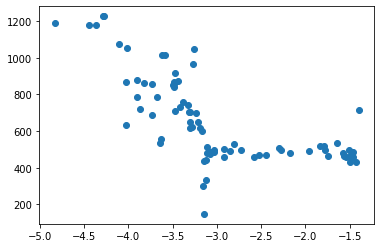

In [46]:
plt.scatter(feat, bat_info["cycle_life"])

plt.show()

## Model Building

In [83]:
# randomly partition into train and test
feat_train, feat_test, label_train, label_test = train_test_split(
    feat, np.log10(bat_info["cycle_life"]) ,
    test_size=0.5
    # the paper split every other cell, resulting in 50-50 mix
)

In [84]:
# scale data
feat_train_scaled = scipy.stats.zscore(feat_train)
feat_test_scaled = scipy.stats.zmap(feat_test, feat_train)

In [85]:
# train model
# Linear Elastic Net with Four-Fold Cross-Validation, alpha = 0.9
# B = linear_model.ElasticNetCV(cv=4, l1_ratio=0.9)

B = linear_model.LinearRegression()
B.fit(np.reshape(feat_train_scaled, (-1,1)), label_train)

LinearRegression()

In [86]:
# make predictions
ypred_train = B.predict(np.reshape(feat_train_scaled, (-1,1)))
ypred_test = B.predict(np.reshape(feat_test_scaled, (-1,1)))

## Evaluation

In [92]:
# calculate prediction interval (incomplete)
print(sklearn.metrics.mean_squared_error(label_train, ypred_train, squared=False))
print(sklearn.metrics.mean_squared_error(label_test, ypred_test, squared=False))

0.14565101694463242
0.10594477943405405


In [88]:
B.score(np.reshape(feat_train_scaled, (-1, 1)), label_train)

0.20750548338046693

In [89]:
B.score(np.reshape(feat_test_scaled, (-1,1)), label_test)

0.44103736577314656

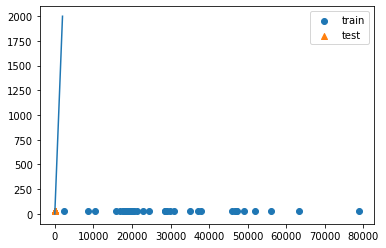

In [96]:
plt.plot(np.arange(2000),np.arange(2000))
plt.scatter(label_train, ypred_train, label="train", marker="o")
plt.scatter(label_test, ypred_test, label="test", marker="^")
plt.legend()
plt.show()